##### SNEHA S 2213712080024

# LOGISTIC REGRESSION

-----

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix , accuracy_score


In [3]:
wine = pd.read_csv("C:/Users/user/Desktop/Sneha's Programs/ML Datasets/winequalityN.csv")
wine.head(2)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6


In [4]:
wine.shape

(6497, 13)

In [5]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [6]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


C:\Users\user\AppData\Local\Temp\ipykernel_5380\4018832724.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(wine['quality'], bins =5)
C:\Users\user\AppData\Local\Temp\ipykernel_5380\4018832724.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(wine['fixed acidity'], bins =5)
C:\Users\user\Ap

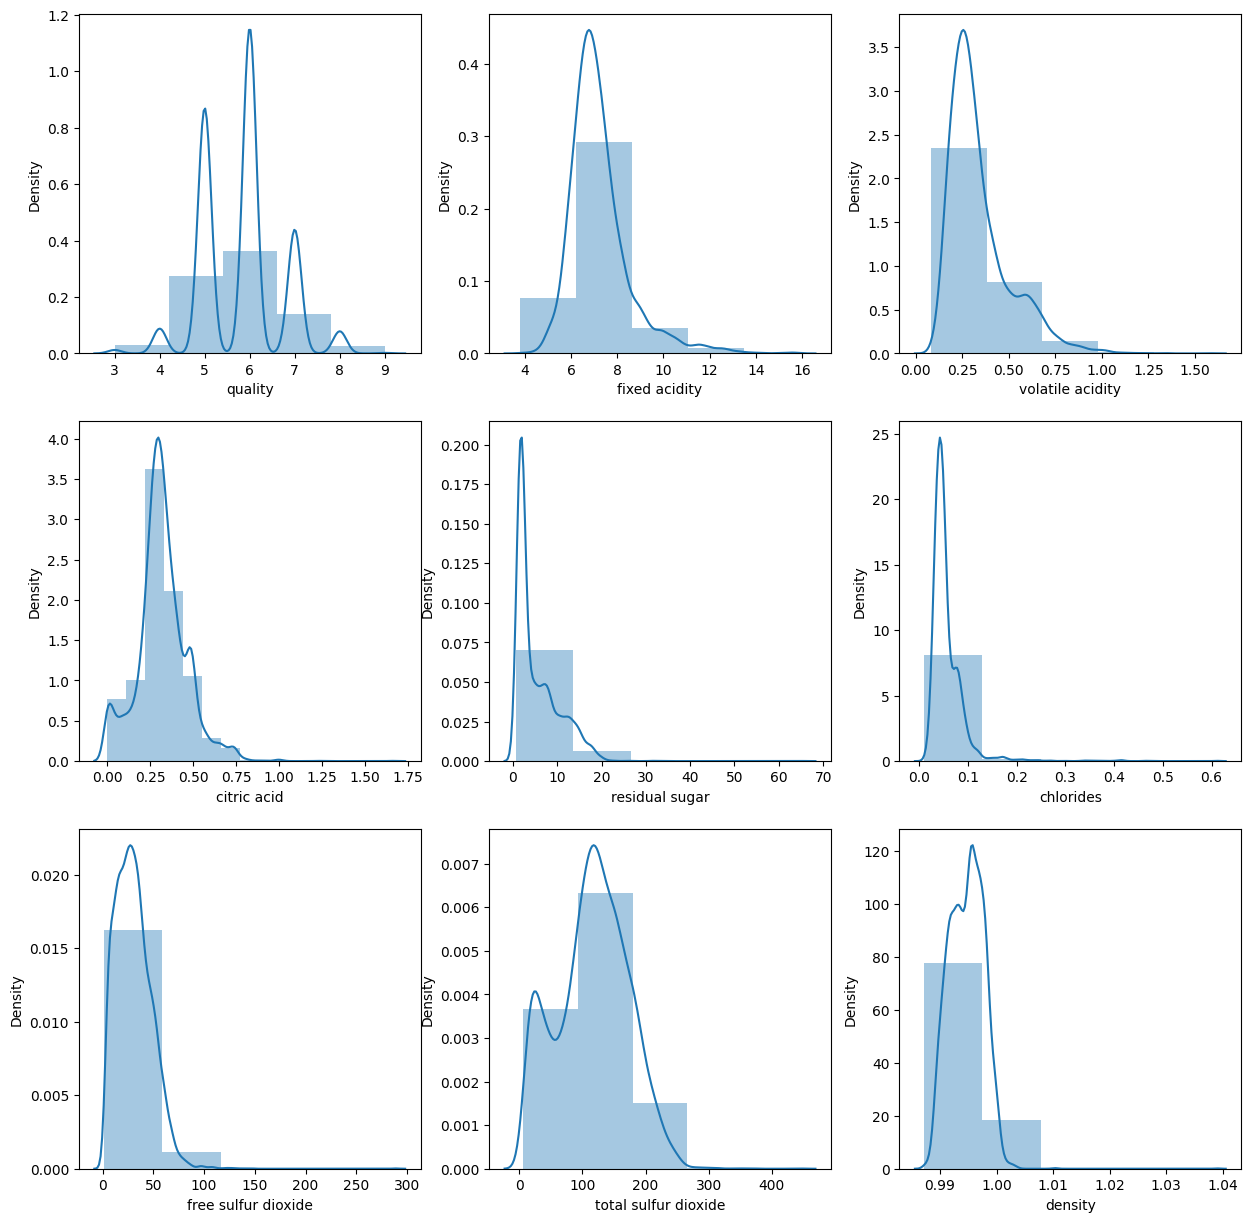

In [7]:
plt.figure(1, figsize =(15,15))
plt.subplot(331)
sns.distplot(wine['quality'], bins =5)
plt.subplot(332)
sns.distplot(wine['fixed acidity'], bins =5)
plt.subplot(333)
sns.distplot(wine['volatile acidity'], bins =5)
plt.subplot(334)
sns.distplot(wine['citric acid'], bins =15)
plt.subplot(335)
sns.distplot(wine['residual sugar'], bins =5)
plt.subplot(336)
sns.distplot(wine['chlorides'], bins =5)
plt.subplot(337)
sns.distplot(wine['free sulfur dioxide'], bins =5)
plt.subplot(338)
sns.distplot(wine['total sulfur dioxide'], bins =5)
plt.subplot(339)
sns.distplot(wine['density'], bins =5)
plt.show()

<Axes: ylabel='Frequency'>

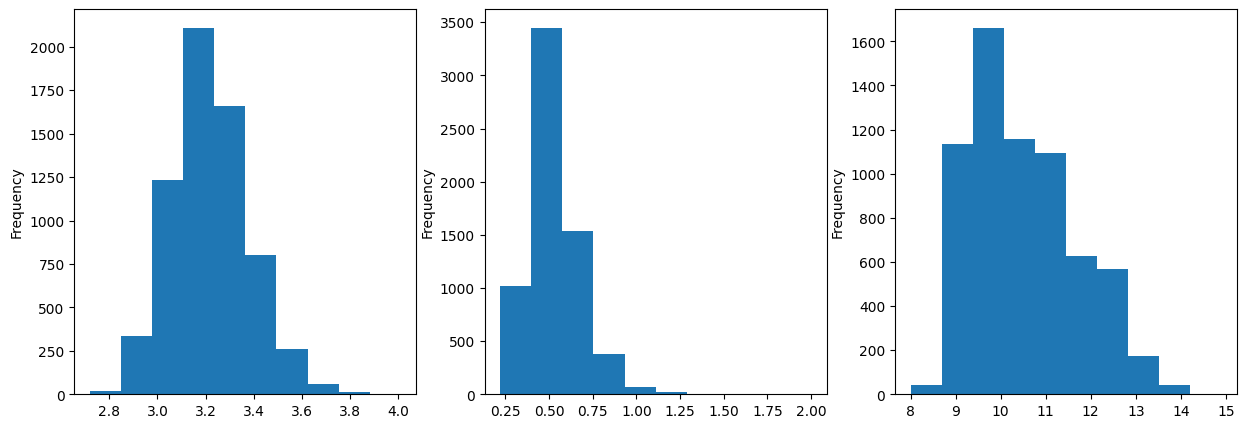

In [9]:
plt.figure(2, figsize=(15,5))
plt.subplot(131)
wine['pH'].plot.hist(bins =10)
plt.subplot(132)
wine['sulphates'].plot.hist(bins =10)
plt.subplot(133)
wine['alcohol'].plot.hist(bins =10)

C:\Users\user\AppData\Local\Temp\ipykernel_5380\3215341503.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(wine.corr(), annot = True, cmap='YlGnBu')


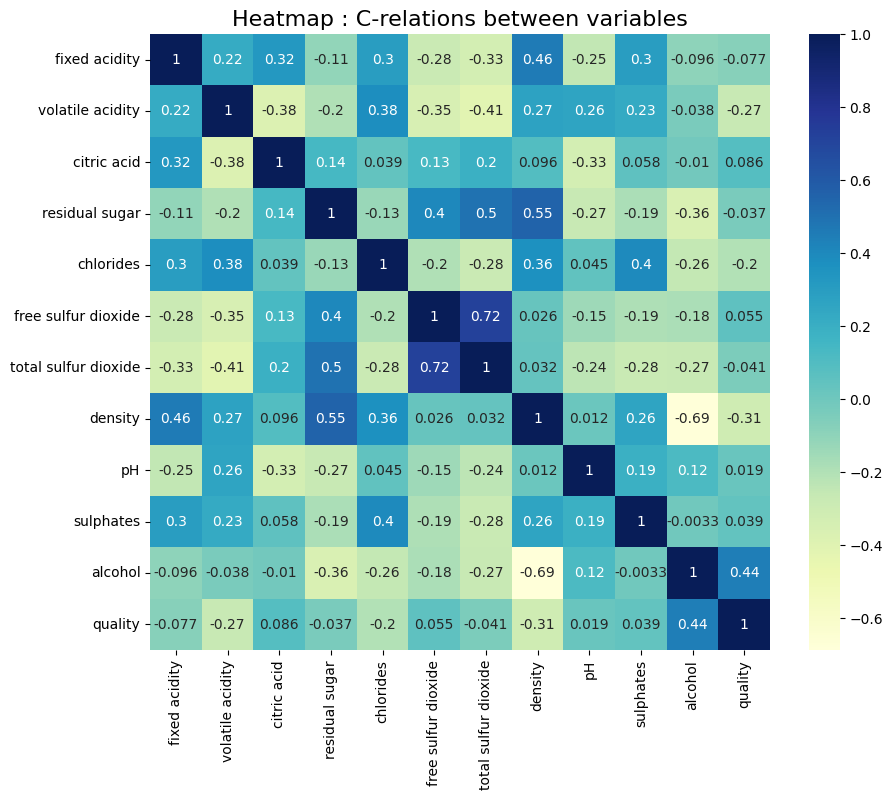

In [12]:
sns.heatmap(wine.corr(), annot = True, cmap='YlGnBu')
fig = plt.gcf()
fig.set_size_inches(10,8)
plt.title('Heatmap : C-relations between variables', fontsize =16)
plt.show()

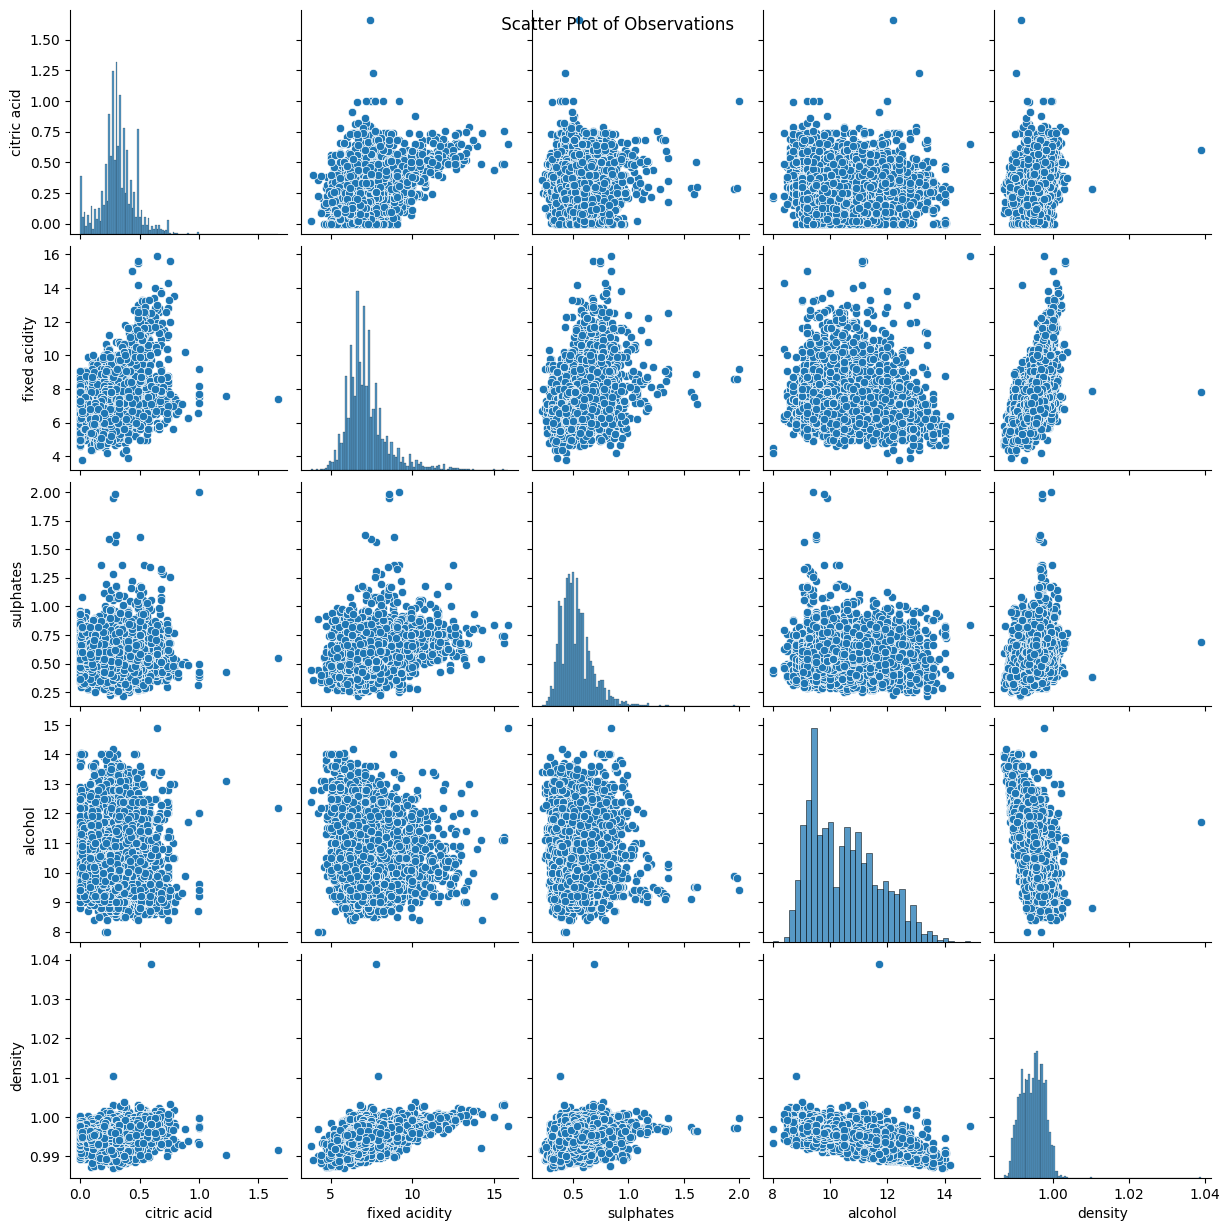

In [13]:
sns.pairplot(wine[['citric acid','fixed acidity','sulphates','alcohol','density']])
plt.suptitle(' Scatter Plot of Observations')
plt.show()

In [15]:
wine.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [16]:
wine = wine.dropna()

In [17]:
wine.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [20]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6463 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6463 non-null   object 
 1   fixed acidity         6463 non-null   float64
 2   volatile acidity      6463 non-null   float64
 3   citric acid           6463 non-null   float64
 4   residual sugar        6463 non-null   float64
 5   chlorides             6463 non-null   float64
 6   free sulfur dioxide   6463 non-null   float64
 7   total sulfur dioxide  6463 non-null   float64
 8   density               6463 non-null   float64
 9   pH                    6463 non-null   float64
 10  sulphates             6463 non-null   float64
 11  alcohol               6463 non-null   float64
 12  quality               6463 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 706.9+ KB


In [21]:
wine1 = wine.drop('type', axis =1)

In [22]:
from scipy import stats
stats.skew(wine1)

array([ 1.72124846e+00,  1.49969230e+00,  4.74797264e-01,  1.43679204e+00,
        5.40217823e+00,  1.22314279e+00, -4.25350757e-04,  5.04087302e-01,
        3.91002891e-01,  1.80252255e+00,  5.65303998e-01,  1.89833721e-01])

In [23]:
stats.kurtosis(wine1)

array([ 5.0439598 ,  2.84253158,  2.41413271,  4.38027943, 50.85790306,
        7.92505324, -0.37033036,  6.60857876,  0.37722289,  8.67137165,
       -0.53318811,  0.2320139 ])

In [24]:
zscore = np.abs(stats.zscore(wine1))
zscore

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.167786,0.422710,0.283959,3.207420,0.315228,0.815609,0.960779,2.099926,1.359160,0.544987,1.418922,0.207846
1,0.707155,0.240479,0.146257,0.808151,0.201180,0.930138,0.288479,0.232465,0.508399,0.276354,0.832184,0.207846
2,0.679794,0.361966,0.559363,0.306117,0.172668,0.029107,0.330745,0.134053,0.259391,0.612146,0.329265,0.207846
3,0.013681,0.665684,0.008554,0.642500,0.055427,0.928238,1.243853,0.300653,0.176373,0.880779,0.496905,0.207846
4,0.013681,0.665684,0.008554,0.642500,0.055427,0.928238,1.243853,0.300653,0.176373,0.880779,0.496905,0.207846
...,...,...,...,...,...,...,...,...,...,...,...,...
6491,0.321892,1.703315,1.643871,0.745079,0.340545,0.141736,1.374580,0.603864,1.255423,1.939871,0.832184,0.207846
6492,0.784208,1.581828,1.643871,0.724055,0.967807,0.083522,1.268427,0.067414,1.442179,0.328071,0.006014,0.937343
6494,0.707155,1.035136,1.299616,0.660984,0.568640,0.085421,1.339195,0.347301,1.255423,1.469762,0.425113,0.207846
6495,1.015366,1.855174,1.368467,0.724055,0.540129,0.083522,1.268427,0.257337,2.189203,1.201129,0.245446,0.937343


In [40]:
outlierlist = np.where(zscore>3)
outlierlist[0]

array([   0,    7,   38,   39,  175,  184,  187,  188,  189,  200,  241,
        242,  244,  281,  283,  314,  314,  360,  383,  393,  430,  431,
        470,  515,  583,  641,  665,  669,  710,  721,  726,  754,  799,
        806,  809,  813,  838,  852,  855,  924, 1011, 1011, 1028, 1134,
       1139, 1193, 1205, 1226, 1231, 1233, 1248, 1345, 1361, 1393, 1393,
       1430, 1452, 1460, 1502, 1527, 1574, 1575, 1581, 1584, 1614, 1629,
       1629, 1639, 1639, 1657, 1664, 1664, 1698, 1751, 1811, 1818, 1832,
       1841, 1876, 1901, 1902, 1907, 1907, 1907, 1927, 2000, 2002, 2012,
       2026, 2026, 2103, 2130, 2162, 2162, 2297, 2310, 2312, 2325, 2349,
       2379, 2417, 2441, 2442, 2465, 2468, 2551, 2596, 2601, 2630, 2644,
       2680, 2681, 2687, 2704, 2711, 2724, 2726, 2747, 2757, 2757, 2757,
       2761, 2763, 2796, 2825, 2848, 2850, 2869, 2938, 2988, 2997, 2999,
       3017, 3024, 3038, 3040, 3046, 3061, 3126, 3126, 3239, 3257, 3262,
       3281, 3281, 3353, 3361, 3383, 3394, 3435, 34

In [28]:
winenew = wine1[(zscore<3).all(axis =1)]
winenew.shape

(5955, 12)

In [46]:
winey = wine1['quality']

In [47]:
winetarget = winey.drop(index = outlierlist[0])
winetarget.shape

(5955,)

In [48]:
xtrain, xtest,ytrain,ytest = train_test_split(winenew, winetarget, random_state = 0 )

In [54]:
 winetarget

1       6
2       6
3       6
4       6
5       6
       ..
6491    6
6492    5
6494    6
6495    5
6496    6
Name: quality, Length: 5955, dtype: int64

In [49]:
winemodel = LogisticRegression()

In [50]:
winemodel.fit(xtrain,ytrain)

C:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [51]:
winemodel.score(xtrain,ytrain)

0.493282579489476

In [52]:
pred = winemodel.predict(xtest)

In [53]:
confusion_matrix(ytest,pred)

array([[  0,   0,   0,   4,   0,   0,   0],
       [  0,   0,  22,  22,   0,   0,   0],
       [  0,   0, 199, 291,   6,   0,   0],
       [  0,   0, 112, 522,   3,   0,   0],
       [  0,   0,  43, 212,   6,   0,   0],
       [  0,   0,   5,  35,   6,   0,   0],
       [  0,   0,   0,   1,   0,   0,   0]], dtype=int64)